# Identifying a Cultural Pattern: A Pilot Study into "#BLM"

### 1. Construct a final project research question related to the interpretation of a cultural pattern that interests you (i.e. "Why is #ThrowbackThursday employed in a different way by Group A than it is by Group B?").

For my final project, I ask, under Peirce's triadic model of semiotics, how have objects changed over time (from 2016 to 2020) in relation to the Sign-vehicle "#BLM" on Twitter to engender nuanced interpretants? 

I hypothesize that the primary relationship between the Sign-vehicle and the Object remains Indexical, however, the Objects themselves have changed over time, paving the way for new interpretants. For example, in 2016, I imagine that the hashtag indexically points to an act of police violence against a Black person in the United States. Here the intepretant is that Black lives are significant, but the Sign-vehicle is also being used as a way to spread information about an event. Four years down the road, racism persists, but I imagine that that on top of information sharing, the hashtag will also point to widespread protests across the country alongside every day racism. While the overall interpretant is consistent -- Black lives are valuable despite racial bias and violence -- new meanings would also emerge. Twitter users who use the hashtag are not only sharing information, but they are indexically positioning themselves along ideological/political spectrum and shaping their identities as individuals who use the hashtag end up iconically resembling another person who uses it as well.

In other words, the hashtag originally pointed to an object (Black lives) being acted upon by a subject (system racism), but continued usage of the hashtag paved for objects to become subjects through replicating legisigns which formulate identity.

### 2. What digital data could you use to study this phenomenon and answer your research question? How could you collect this data? Consult the [Final Project Assignment Page](https://canvas.uchicago.edu/courses/32762/assignments/302908) for several data search tools and feel free to talk with your instructor or TA if you have any further questions about how you might find and collect data related to your research question.

I plan on using Tweets from between 2016 and 2020 that include the hashtag blacklivesmatter or blm or some variation. I am assuming usage between "#blm" and "#blacklivesmatter" will not be different. [arXiv](https://arxiv.org), an open access repository of electronic preprints owned by Cornell University, has shared [Tweet IDs](https://zenodo.org/record/4056563#.YCW73C1h1hE) for 41.8 million tweets from 10 million different users.

### 3. Download this data on your computer (if you are web-scraping, or have an exceptionally challenging data source to gather from and analyze, you may choose to download only a subset of the data for the purposes of this assignment) and load it into your Python Jupyter notebook. Print out a small sample of your data in your Jupyter notebook (i.e. using the .head() command, if you're using Pandas).

Due to Twitter's user guidelines, the Tweet ID link shared above only contains unique identifiers linked to a specific tweet. It does not contain the actual text of the tweet itself. These tweet IDs need to be "hydrated" first. Essentially, after opening the downloaded CSV file from arXiv, I grabbed the last 500,000 tweet IDs and saved them into a .txt file. From there, I used [hydrator](https://github.com/DocNow/hydrator), an open source application that takes in a list of tweet IDs and returns a .csv file which contains the text of the tweet in addition to metadata such as the date/time of tweet and the number of retweets, if any.

Twitter rate limits the number of tweets that can be "hydrated" over a given amount of time, which is why I decided to use half a million tweet IDs for this assignment. This returned about 389,000 tweets for an initial analysis. I plan on using more data for the final project. I estimate that it would take around 10 hours to hydrate 1,000,000 tweet IDs. 

In [85]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

pd.options.display.max_columns = None  # Shows all columns of a dataframe in Jupyter Notebook

In [86]:
def data_loader():
    """Loads in BLM Tweets and prints out the first five rows."""

    df = pd.read_csv(
        '/users/danielchen/desktop/blm_tweets_389k.csv', low_memory=False)
    
    return df

In [87]:
blm = data_loader()
blm.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Fri Jul 15 17:06:28 +0000 2016,BlackLivesMatter,https://twitter.com/TheWire985/status/75399918...,http://buff.ly/29I1p76,1,753999182835412993,NaN,NaN,NaN,en,NaN,False,1,NaN,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",How Black Radio Hurts #BlackLivesMatter https:...,https://twitter.com/TheWire985/status/75399918...,Sun Apr 03 19:07:21 +0000 2016,TheWire985,False,"FM Radio: Music-Talk. Hip-Hop, R&B, and Timele...",109,306,123,16,Orlando,The Wire 98.5,TheWire985,79016,NaN,http://www.TheWire985.com,False
1,NaN,Fri Jul 15 17:12:17 +0000 2016,blacklivesmatter,NaN,http://chi.mg/29UAAkx,0,754000645536047104,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://mobile.twitter.com"" rel=""nofol...","Incredible, incredible girls!! How 4 Teenage G...",https://twitter.com/Womens_Wire/status/7540006...,Fri Apr 04 05:48:22 +0000 2014,Womens_Wire,False,A platform for the voices and activism of inte...,13307,585,619,38,United States,Women's Wire,Womens_Wire,10666,NaN,https://www.womenswiremedia.org/,False
2,NaN,Fri Jul 15 17:11:43 +0000 2016,BlackLivesMatter,NaN,https://twitter.com/pj1017__/status/7539991226...,0,754000504775118848,NaN,NaN,NaN,und,NaN,False,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",#BlackLivesMatter 😂😂 https://t.co/tT8lxhw8sF,https://twitter.com/BigP____/status/7540005047...,Sun Oct 10 12:01:58 +0000 2010,BigP____,False,Rest in Peace Quwan Forever My Brother,1043,2925,1365,7,With Jb ✌,Sosa mommy,BigP____,99467,NaN,NaN,False
3,NaN,Fri Jul 15 17:14:08 +0000 2016,blacklivesmatter,NaN,NaN,0,754001110394806272,NaN,NaN,NaN,en,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",You cannot link arms under a universalist bann...,https://twitter.com/casbahgal/status/754001110...,Wed Oct 24 18:13:57 +0000 2012,casbahgal,False,"Sociology Professor to some, Mom to those few :)",3045,65,220,10,NaN,Denise,casbahgal,1449,NaN,NaN,False
4,NaN,Fri Jul 15 17:12:53 +0000 2016,alllivesmatter blacklivesmatter,NaN,NaN,1,754000798133084160,NaN,NaN,NaN,en,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",If I ever go on a real first date my first que...,https://twitter.com/SixFootShawty/status/75400...,Sun Apr 05 22:26:16 +0000 2015,SixFootShawty,False,2 Corinthians 5:17 | Towson Alumna | BGM✨,28319,417,397,5,In Christ,Omolere,SixFootShawty,33338,NaN,NaN,False


In [88]:
def data_cleaner(dataframe):
    """XXY"""

    df = dataframe.copy()

    # Replaces cops and officers to police 
    replacements = {
        'text': {
            'cops': 'police',
            'officers': 'police',
        }
    }    
    df.replace(replacements, regex=True, inplace=True)

    # Replaces hyperlinks with an empty string character
    link_format = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    df['text'] = df['text'].str.replace(link_format, '') 
    
    # Creates new column that is just the year 
    df['year'] = [date[-4:] for date in df['created_at']]

    return df

In [89]:
blm = data_cleaner(blm)

In [90]:
blm_2020 = blm[blm['year'] == '2020']
blm_2016 = blm[blm['year'] == '2016']

In [91]:
blm_stops = [
    '#blacklivesmatter',
    '#blklivesmatter'
    '#bluelivesmatter',
    '#alllivesmatter',
    'people',
    'movement',
    'lives',
    'matter',
    'blue',
    'blm',
    'time',
    'today',
    'rt',
    '...'
]
stop_words = (nltk.corpus.stopwords.words('english')
              + list(string.punctuation)
              + blm_stops)

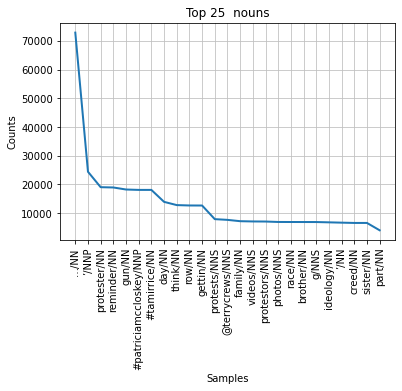

In [92]:
tknzr = TweetTokenizer()

# Define function to get position tag of token
def pos_tag(text):
    # Tokenize words using nltk.word_tokenize, keeping only those tokens that do not appear in the stop words we defined
    tokens = [i for i in tknzr.tokenize(text.lower()) if i not in stop_words]

    # Label parts of speech automatically using NLTK
    pos_tagged = nltk.pos_tag(tokens)
    return pos_tagged

# Define function that plots the top user specified part of speech
def plot_top_pos(series, data_description, pos):
    # Apply part of Speech tagger that we wrote above to any Pandas series that pass into the function
    pos_tagged = series.apply(pos_tag)

    # Extend list so that it contains all words/parts of speech for all the captions
    pos_tagged_full = []
    for i in pos_tagged:
        pos_tagged_full.extend(i)

    # Create Frequency Distribution of different adjectives and plot the distribution
    fd = nltk.FreqDist(word + "/" + tag for (word, tag)
                       in pos_tagged_full if tag[:2] == pos)
    fd.plot(25, title='Top 25  ' + data_description)
    return

plot_top_pos(blm_2020['text'], 'nouns', 'NN')

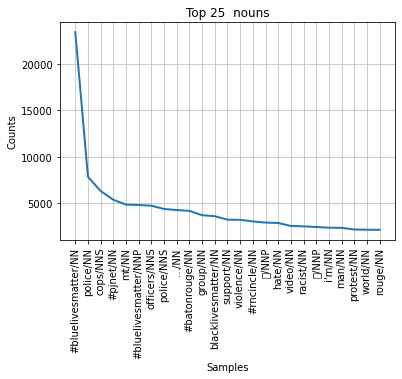

In [93]:
plot_top_pos(tweets_2016['text'], 'nouns', 'NN')

In [6]:
blm_tweets['created_at'] = pd.to_datetime(blm_tweets['created_at'])

In [8]:
blm_tweets['date'] = blm_tweets['created_at'].dt.date

In [10]:
blm_tweets.groupby('date').size()

date
2016-07-15     33314
2016-07-16     16489
2016-07-17     55792
2016-07-18     32660
2016-07-19     35465
2016-07-20     23600
2020-06-30    131780
dtype: int64